In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


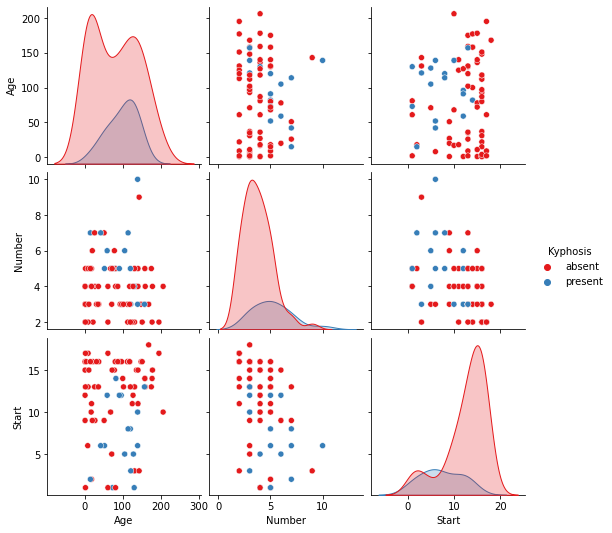

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train) 

DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)

In [13]:
 from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.75      0.79      0.77        19
     present       0.20      0.17      0.18         6

    accuracy                           0.64        25
   macro avg       0.47      0.48      0.48        25
weighted avg       0.62      0.64      0.63        25



[[15  4]
 [ 5  1]]


In [15]:
#TREE VISUALIZATION

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

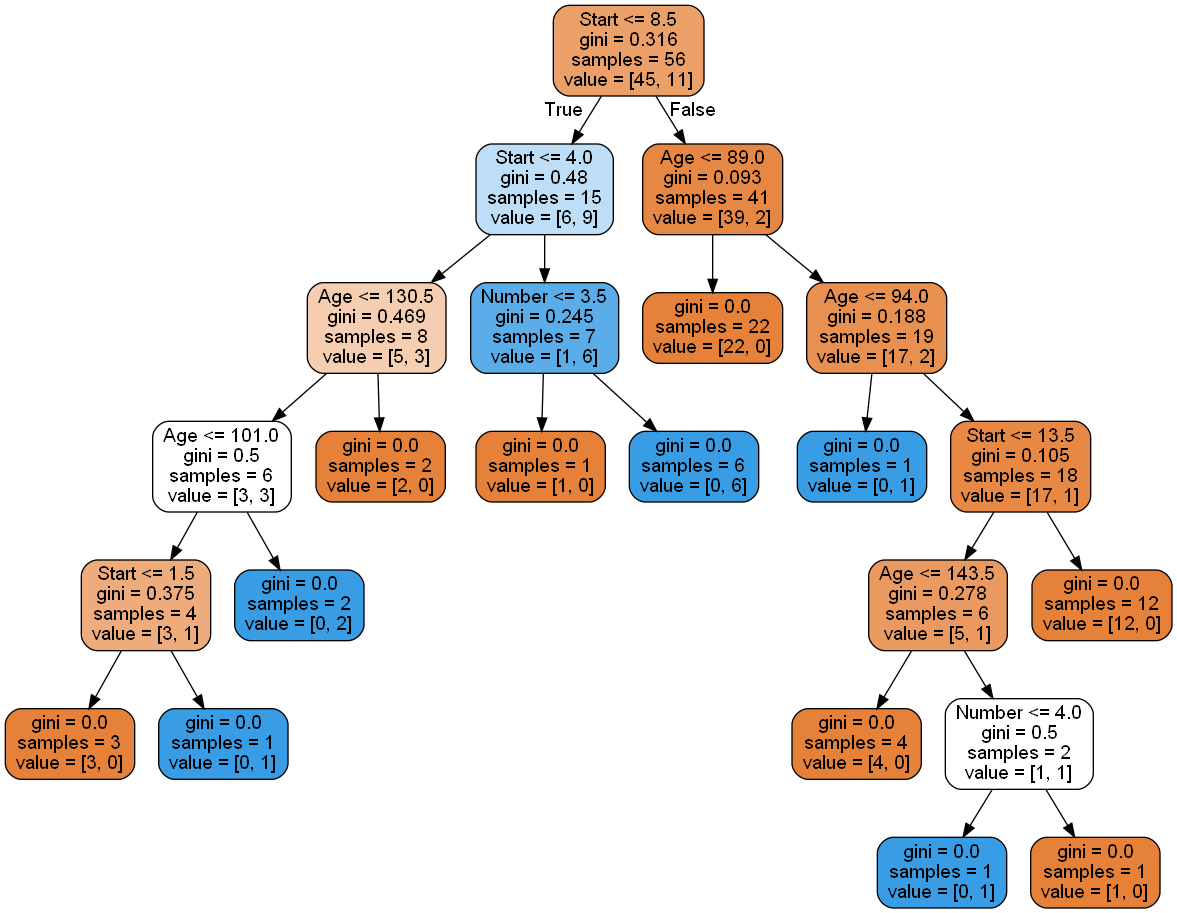

In [17]:
dot_data =  StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,
               filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [18]:
#RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [22]:
 predrfc = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predrfc))
print('\n')
print(confusion_matrix(y_test,predrfc))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



[[19  0]
 [ 5  1]]


In [24]:
#Decision Trees and Random Forests Project

In [25]:
import numpy as np
import pandas as pd

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [28]:
loans = pd.read_csv('loan_data.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [29]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


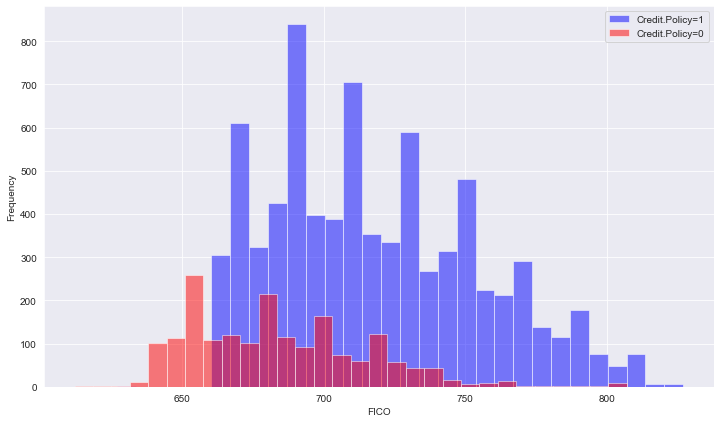

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))

loans[loans['credit.policy']==1]['fico'].plot.hist(bins=30,color='blue',alpha=0.5,
                                                   label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].plot.hist(bins=30,color='red',alpha=0.5,
                                                  label='Credit.Policy=0')

plt.xlabel('FICO')
plt.legend()

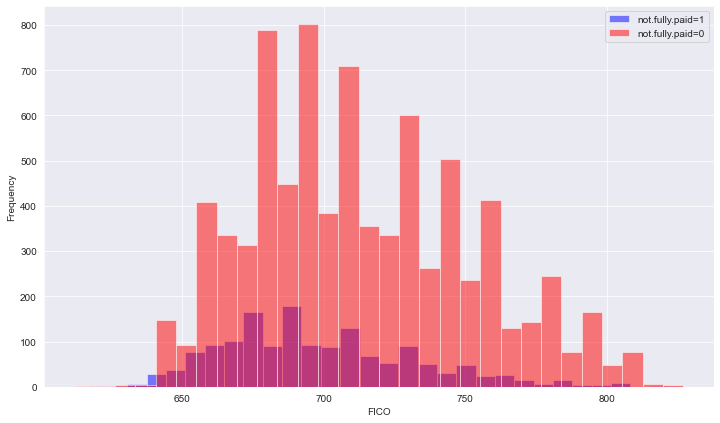

In [31]:
plt.figure(figsize=(12,7))

loans[loans['not.fully.paid']==1]['fico'].plot.hist(bins=30,alpha=0.5,
                            color='blue',label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].plot.hist(bins=30,alpha=0.5,
                            color='red',label='not.fully.paid=0')

plt.xlabel('FICO')
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

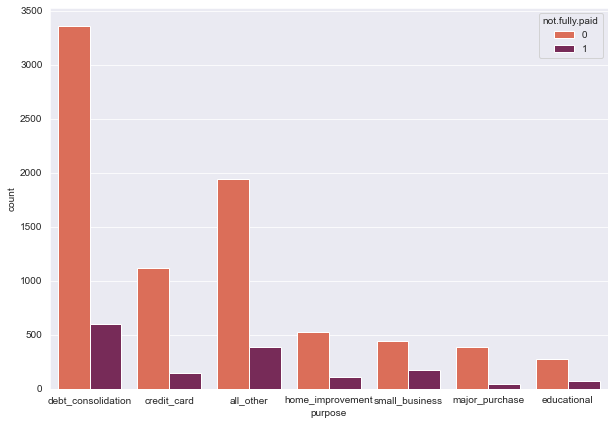

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='rocket_r')

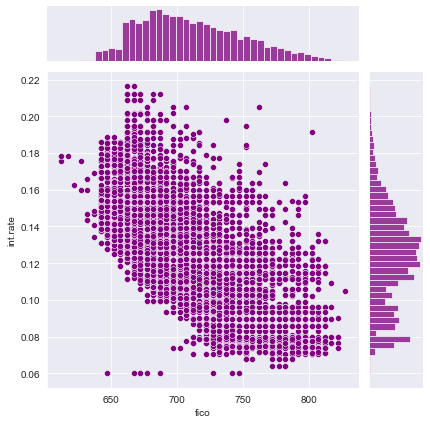

In [33]:
sns.jointplot(x=loans['fico'],y=loans['int.rate'],color='purple')

In [34]:
#Create the following lmplots to see 
#if the trend differed between not.fully.paid and credit.policy. 
#Check the documentation for lmplot() 
#if you cant figure out how to separate it into columns ##

<Figure size 720x504 with 0 Axes>

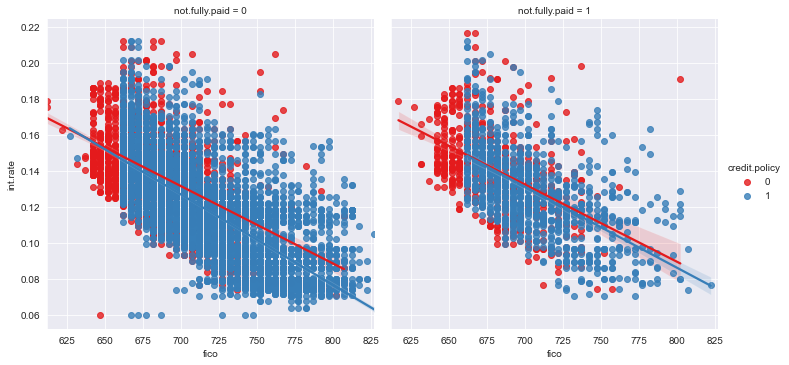

In [35]:
plt.figure(figsize=(10,7))

sns.lmplot(x='fico',y='int.rate',data=loans,
          hue='credit.policy',col='not.fully.paid',palette='Set1')

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [37]:
cat_feats = ['purpose']

In [38]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [39]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [40]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [41]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [42]:
X = final_data.drop('not.fully.paid', axis=1)

y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
pred_1 = dtc.predict(X_test)

In [48]:
print(classification_report(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.20      0.19       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874

[[2001  407]
 [ 372   94]]


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
pred_2 = rfc.predict(X_test)

In [53]:
print(classification_report(y_test,pred_2))
print(confusion_matrix(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.42      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874

[[2393   15]
 [ 455   11]]


In [54]:
#New Dataset

In [55]:
import pandas as pd

In [56]:
train_data = pd.read_csv('train.csv',index_col=False)
del train_data['Unnamed: 0']
train_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [58]:
train_data['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [59]:
train_data['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [60]:
train_data['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [61]:
train_data['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [62]:
#Numerical maps for categorical data
train_data['Gender'] = train_data['Gender'].map({'Female':0,'Male':1})
train_data['Customer Type'] = train_data['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
train_data['Type of Travel'] = train_data['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
train_data['Class'] = train_data['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [63]:
del train_data['id']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_data.dropna(inplace=True)

In [66]:
train_data.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [67]:
train_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [68]:
X = train_data.drop('satisfaction',axis=1)

y = train_data['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
pred_1 = dtree.predict(X_test)

In [73]:
pred_1

array(['satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'satisfied', 'satisfied'],
      dtype=object)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(pred_1,y_test))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     19358
              satisfied       0.94      0.94      0.94     14829

               accuracy                           0.95     34187
              macro avg       0.94      0.94      0.94     34187
           weighted avg       0.95      0.95      0.95     34187



In [76]:
print(confusion_matrix(pred_1,y_test))

[[18408   950]
 [  924 13905]]


In [77]:
#Evaluating the model on the test data now

In [78]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [79]:
#Please note: unnamed and id columns were deleted as they have no consequence on our result
#Both deleted using the 'del' method
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [80]:
#Numerical maps for categorical data
test_data['Gender'] = test_data['Gender'].map({'Female':0,'Male':1})
test_data['Customer Type'] = test_data['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Business travel':0,'Personal Travel':1})
test_data['Class'] = test_data['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [81]:
test_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0,0,52,0,1,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,0,0,36,0,0,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,1,1,20,0,1,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,1,0,44,0,0,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,0,0,49,0,1,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,1,1,34,0,0,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,1,0,23,0,0,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,0,0,17,1,1,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,1,0,14,0,0,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [82]:
test_data.dropna(inplace=True)

In [83]:
del test_data['Unnamed: 0']
del test_data['id']

In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer Type                      25893 non-null  int64  
 2   Age                                25893 non-null  int64  
 3   Type of Travel                     25893 non-null  int64  
 4   Class                              25893 non-null  int64  
 5   Flight Distance                    25893 non-null  int64  
 6   Inflight wifi service              25893 non-null  int64  
 7   Departure/Arrival time convenient  25893 non-null  int64  
 8   Ease of Online booking             25893 non-null  int64  
 9   Gate location                      25893 non-null  int64  
 10  Food and drink                     25893 non-null  int64  
 11  Online boarding                    25893 non-null  int

In [85]:
pred_2 = dtree.predict(test_data.drop('satisfaction',axis=1))

In [86]:
test_data['pred_satisfaction'] = pred_2

In [87]:
test_data[['satisfaction','pred_satisfaction']]

,satisfaction,pred_satisfaction
0,satisfied,satisfied
1,satisfied,satisfied
2,neutral or dissatisfied,neutral or dissatisfied
3,satisfied,satisfied
4,satisfied,neutral or dissatisfied
...,...,...
25971,neutral or dissatisfied,neutral or dissatisfied
25972,satisfied,satisfied
25973,neutral or dissatisfied,neutral or dissatisfied
25974,satisfied,satisfied


In [88]:
test_data['satisfaction'].value_counts()

neutral or dissatisfied    14528
satisfied                  11365
Name: satisfaction, dtype: int64

In [89]:
test_data['pred_satisfaction'].value_counts()

neutral or dissatisfied    14487
satisfied                  11406
Name: pred_satisfaction, dtype: int64

In [90]:
#We can see that our model predicted with the results to a 99% accuracy

In [91]:
import seaborn as sns

In [92]:
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [93]:
test_data['pred_satisfaction'] = test_data['pred_satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

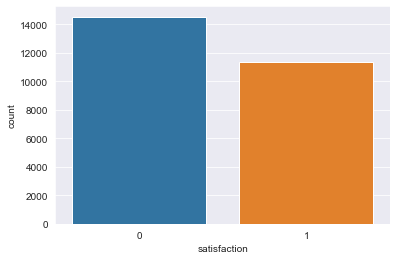

In [94]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
%matplotlib inline
sns.countplot(x='satisfaction',data=test_data)

<AxesSubplot:xlabel='pred_satisfaction', ylabel='count'>

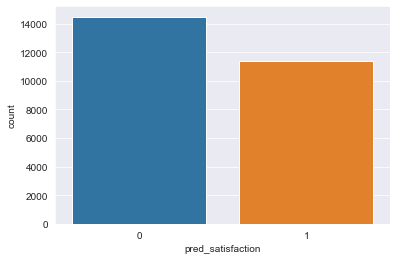

In [95]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
%matplotlib inline
sns.countplot(x='pred_satisfaction',data=test_data)